# Taller gradiente descendente

## Nombre Michelle Quintero Hernández Y Brayan Tabares Hidalgo

In [1]:
# dependecias para todo el taller. No se deben agregar más dependecias
import numpy as np
import math
from matplotlib import pyplot as plt

Carga de datos base:

In [2]:
tam = 300
x = np.linspace(0,5,tam)
# t = np.sin(2*np.pi*x)+np.random.normal(0,0.4,tam)
t=np.loadtxt('matrizT.txt')

1- Muestre la señal $t$ en un gráfico.

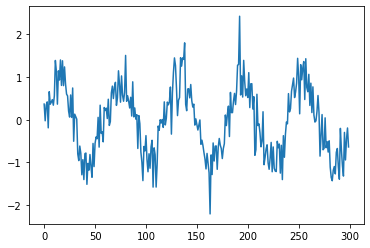

In [3]:
plt.plot(t)
plt.show()
plt.ion()

2- Usando mínimos cuadrados desarrolle para cada una de las tres de funciones base una solución que se ajuste a la señal mostrada en el punto anterior. Defina los valores de m y s en cada uno de los tres casos. Realice un gráfico comparativo para cada $\hat{t}$ vs t, y uno final de todas las $\hat{t}$s vs t. Muestré los errores de cada $\hat{t}$. Use subplot. ¿Que puede intepretar de los resultados? (1.2)

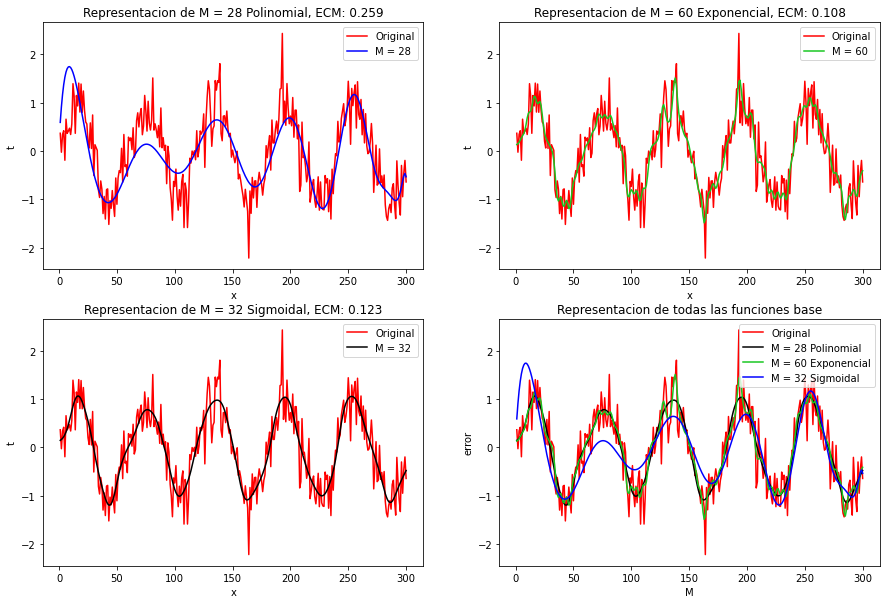


            ---W Polinomial---,            ---W Exponencial---,                 ---W Sigmoidal
            0.5909043822512436,             0.1251499424140685,            0.09840097257859123
            106.29901102779661,            0.16106777473385747,              1.310865987642818
            -3185.795586965193,             0.6000347167123389,            -0.7629389091315688
            37330.984753936755,             0.9383115563036948,            -1.3195609188246404
            -287615.6355158874,             0.8336104008616712,            -0.9142336755621914
            1693491.8310991176,            0.09562130792034983,             1.4373042775991791
            -6833301.542680727,           -0.05990069680971867,            0.27381477963872747
            15439625.973218031,             -1.081286532521303,             0.7841955923410104
           -10525803.274549112,             -1.153448223865767,           -0.14866058481686126
            -24806856.71916285,            -1.231

In [4]:
def generarPhi(x, m, f):
    s1 = 0.007
    s2 = 0.01
    val = np.arange(m)
    u=np.linspace(0,1,m)
    phi= np.arange(0,len(t),1)
    phi2= np.linspace(0,1,len(t))
    phiF = np.ones((len(x), len(val)),dtype=np.float64)
    for i in range(0, len(x), 1):
        for j in range(1, len(val), 1):
            if(f == 'p'):
                phiF[i,j] = phi2[i]**val[j]
            if(f == 'e'):
                phiF[i, j] = math.exp(-(((phi2[i]-u[j])**2)/(2*s1**2)))
            if(f == 's'):
                a=(phi2[i]-u[j])/s2
                phiF[i, j] = 1/(1+math.exp(-a))
     
    return phiF

def CalcularW(phi):
    t0=np.array(t)
    t1=t0.reshape(len(t0),1)
    return np.linalg.inv(phi.T@phi)@phi.T@t1

def errorCuadraticoMedio(phi,w):
    t0=np.array(t)
    t1=t0.reshape(len(t0),1)
    return np.mean(((phi@w)-t1)**2,dtype=np.longdouble)

#Valores de M

m1=28
m2=60
m3=32

#Graficación------------------------------------------------

names=np.array(['M = '+str(m1),'M = '+str(m2),'M = '+str(m3)])
plt.ion()

#Calcular Predicción
phiPoli = generarPhi(x, m1, 'p')
phiExpo = generarPhi(x, m2, 'e')
phiSigmo = generarPhi(x, m3, 's')

wPoli = CalcularW(phiPoli)
wExpo = CalcularW(phiExpo)
wSigmo = CalcularW(phiSigmo)

tpPoli=phiPoli@wPoli
tpExpo=phiExpo@wExpo
tpSigmo=phiSigmo@wSigmo

errorPoli=errorCuadraticoMedio(phiPoli,wPoli)
errorExpo=errorCuadraticoMedio(phiExpo,wExpo)
errorSigmo=errorCuadraticoMedio(phiSigmo,wSigmo)

t0=np.arange(1,len(t)+1,1)
t1=t0.reshape(len(t0),1)

plt.subplots(2,2,figsize=(15,10))

plt.subplot(2,2,1)
plt.plot(t1,t,'r',t1,tpPoli,'b')
plt.legend(['Original',names[0]])
plt.xlabel("x")
plt.ylabel("t")
plt.title("Representacion de "+names[0]+" Polinomial, ECM: "+"{:.3f}".format(errorPoli))

plt.subplot(2,2,2)
plt.plot(t1,t,'r',t1,tpExpo,'#17C620')
plt.legend(['Original',names[1]])
plt.xlabel("x")
plt.ylabel("t")
plt.title("Representacion de "+names[1]+" Exponencial, ECM: "+"{:.3f}".format(errorExpo))


plt.subplot(2,2,3)
plt.plot(t1,t,'r',t1,tpSigmo,'k')
plt.legend(['Original',names[2]])
plt.xlabel("x")
plt.ylabel("t")
plt.title("Representacion de "+names[2]+" Sigmoidal, ECM: "+"{:.3f}".format(errorSigmo))


plt.subplot(2,2,4)
plt.plot(t1,t,'r',t1,tpSigmo,'k',t1,tpExpo,'#17C620',t1,tpPoli,'b')
plt.legend(['Original',names[0]+" Polinomial",names[1]+" Exponencial",names[2]+" Sigmoidal"])
plt.xlabel("M")
plt.ylabel("error")
plt.title("Representacion de todas las funciones base")

plt.show()

print()
titulo = np.array(['---W Polinomial---','---W Exponencial---','---W Sigmoidal'])
titulo = titulo[np.newaxis, :]
wbles = np.concatenate((np.concatenate(( wPoli, np.zeros((m2-m1,1))) ,axis=0) ,wExpo),axis=1)
wbles = np.concatenate((wbles, np.concatenate(( wSigmo, np.zeros((m2-m3,1))) ,axis=0) ),axis=1)
wbles = np.concatenate((titulo, wbles),axis=0)
for i in wbles:
    print(", ".join([str(l).rjust(30) for l in i]))

- En la función polinomial con un M = 28 se aprecia un comportamiento similar en algunos picos de t sin mucha consistencia. Adicionalmente se aprecia un sobre ajuste en algunos picos.

- En la función exponencial con un M = 60 se aprecia un comportamiento mejorado con respecto a la función   polinomial en cuanto a similitud, sin embargo, se aprecia un mayor sobreajuste además de poca suavidad en la fórma de la gráfica.

- En la función Sigmoidal con un M = 32 se aprecia un comportamiento similar a t con un trazo más suave que la función exponencial y con picos más consistentes, asemejándose más a la función seno. No se aprecia sobre ajuste más allá del segundo pico.

- Considerando las funciones anteriores, se elige el M = 32 como el más apropiado debido a su acercamiento a la función sin recaer en el sobreajuste con respecto a t.

3- Ahora programe una función para generar $w$ y $\hat{t}$ usando el algoritmo de gradiente descendente. Defina el caso de parada usando un error esperado y cantidad máxima de iteraciones (debe manejar ambos casos). Recuerde que la ecuación para calcular $w$ esta dada por:

$w_{j} = w_{j} - \alpha \Delta$

Retorne $w$, $\hat{t}$, el número de iteraciones y el error obtenido. (1.2). Una solución ideal no debe usar todas las iteraciones.

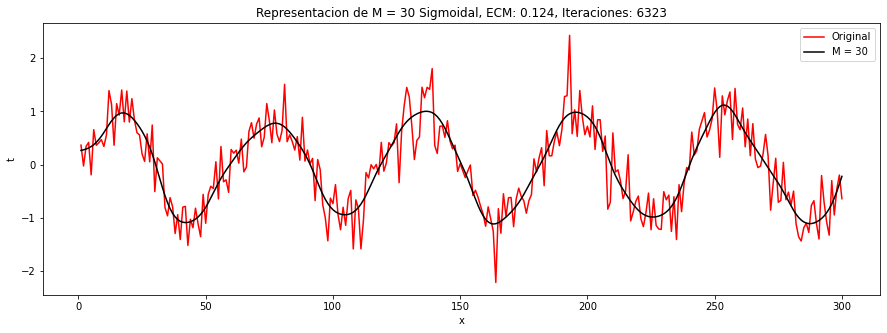

In [5]:
def calcularWGradiente(w,m,phi, errEsperado, aprendizaje, iteraciones):
    t1=np.array(t)
    tP=phi@w
    errActual=errorCuadraticoMedio(phi,w)    
    i=0
    while errEsperado<errActual and  i<iteraciones and errActual<9999:
        for j in range(m):
            delta=calcularDelta(tP[:,0],t1,phi[:,j])
            w[j]=w[j]-aprendizaje*delta
        tP=phi@w
        #print(w)
        errActual=errorCuadraticoMedio(phi,w)
        #print(errActual)        
        i+=1   
    return i,w

    
def calcularDelta(tP,t1,phi):
    return np.mean((tP-t1)*phi,dtype=np.float64)

def generarInicioW(aleatorio, tamano, numero):
    aux = np.full((tamano,1),numero,dtype=np.float64)
    if not aleatorio:
        return np.full((tamano,1),numero)
    return np.random.randn(*aux.shape)

#Valores de M

m1=0
m2=0
m3=30

#Graficación------------------------------------------------

names=np.array(['M = '+str(m1),'M = '+str(m2),'M = '+str(m3)])
plt.ion()

#Calcular Predicción
phiPoli = generarPhi(x, m1, 'p')
phiExpo = generarPhi(x, m2, 'e')
phiSigmo = generarPhi(x, m3, 's')

#Generar las w Iniciales
w1=generarInicioW(True,m1,1)
w2=generarInicioW(True,m2,1)
w3=generarInicioW(True,m3,1)

# canPoli,wPoli = calcularWGradiente(w1,m1,phiPoli,0.1,0.1,20000)
# canExpo,wExpo = calcularWGradiente(w2,m2,phiExpo,0.1,0.1,40000)
canSigmo,wSigmo = calcularWGradiente(w3,m3,phiSigmo,errorSigmo+0.0009,0.1,20000)

# tpPoli=phiPoli@wPoli
# tpExpo=phiExpo@wExpo
tpSigmo=phiSigmo@wSigmo


t0=np.arange(1,len(t)+1,1)
t1=t0.reshape(len(t0),1)

#Visualizar gráfica

plt.subplots(1,1,figsize=(15,5))

plt.subplot(1,1,1)
plt.plot(t1,t,'r',t1,tpSigmo,'k')
plt.legend(['Original',names[2]])
plt.xlabel("x")
plt.ylabel("t")
plt.title("Representacion de "+names[2]+" Sigmoidal, ECM: "+"{:.3f}".format(errorCuadraticoMedio(phiSigmo,wSigmo))
          +", Iteraciones: "+str(canSigmo))

plt.show()

4- Usando las tres funciones base con los mismos $m$ obtenidos en el punto $2$, calcule $\hat{t}$ usando gradiente descendente y responda. 

¿Cuantas iteraciones tomó para el calculo de $w$?. 
¿Qué tan cerca quedo del $w$ generado con mínimos cuadrados?

Grafique los resultados obtenido realizando la comparación de t y $\hat{t}$. Muestre el número de interaciones, M y el error. (1.2)

In [6]:
def graficar(t1, t, tpPoli, canPoli, errorPoliG, tpExpo, errorExpoG, canExpo, tpSigmo, canSigmo, errorSigmoG, names ):
    
    plt.ion()
    plt.subplots(2,2,figsize=(15,10))

    plt.subplot(2,2,1)
    plt.plot(t1,t,'r',t1,tpPoli,'b')
    plt.legend(['Original',names[0]])
    plt.xlabel("x")
    plt.ylabel("t")
    plt.title("Representacion de "+names[0]+" Polinomial, ECM: "+"{:.3f}".format(errorPoliG)
              +", Iteraciones: "+str(canPoli))

    plt.subplot(2,2,2)
    plt.plot(t1,t,'r',t1,tpExpo,'#17C620')
    plt.legend(['Original',names[1]])
    plt.xlabel("x")
    plt.ylabel("t")
    plt.title("Representacion de "+names[1]+" Exponencial, ECM: "+"{:.3f}".format(errorExpoG)
              +", Iteraciones: "+str(canExpo))


    plt.subplot(2,2,3)
    plt.plot(t1,t,'r',t1,tpSigmo,'k')
    plt.legend(['Original',names[2]])
    plt.xlabel("x")
    plt.ylabel("t")
    plt.title("Representacion de "+names[2]+" Sigmoidal, ECM: "+"{:.3f}".format(errorSigmoG)
              +", Iteraciones: "+str(canSigmo))


    plt.subplot(2,2,4)
    plt.plot(t1,t,'r',t1,tpSigmo,'k',t1,tpExpo,'#17C620',t1,tpPoli,'b')
    plt.legend(['Original',names[0]+" Polinomial",names[1]+" Exponencial",names[2]+" Sigmoidal"])
    plt.xlabel("M")
    plt.ylabel("error")
    plt.title("Representacion de todas las funciones base")

    plt.show()

    print("Error Cuadrados Polinomial: "+str(errorPoli))
    print("Error Gradiente Polinomial: "+str(errorPoliG))
    print("Diferencia Polinomial: "+str(errorPoliG-errorPoli))
    print("Error Cuadrados Exponencial: "+str(errorExpo))
    print("Error Gradiente Exponencial: "+str(errorExpoG))
    print("Diferencia Exponencial: "+str(errorExpo-errorExpoG))
    print("Error Cuadrados Sigmoidal: "+str(errorSigmo))
    print("Error Gradiente Sigmoidal: "+str(errorSigmoG))
    print("Diferencia Sigmoidal: "+str(errorSigmo-errorSigmoG))
    

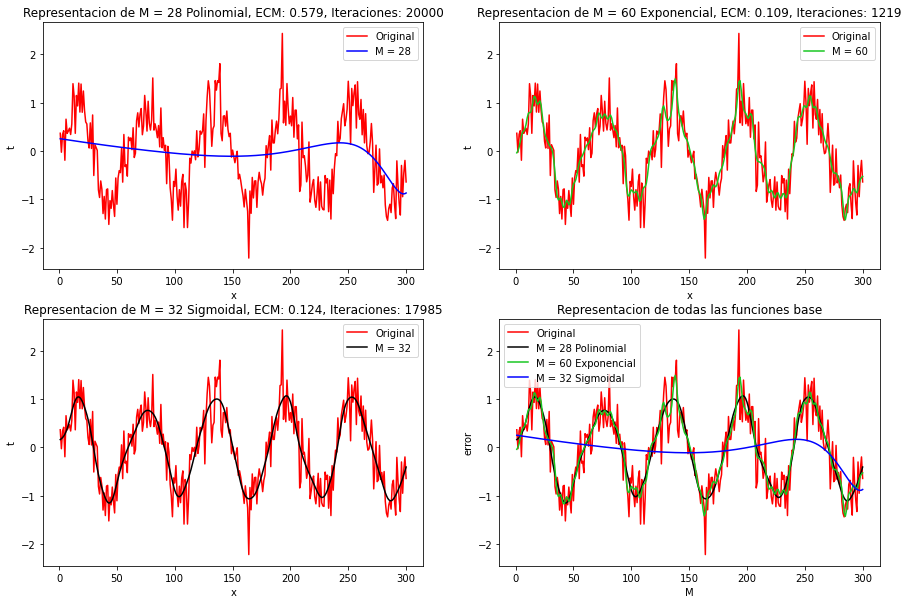

Error Cuadrados Polinomial: 0.2592687713255388
Error Gradiente Polinomial: 0.5787942300226295
Diferencia Polinomial: 0.3195254586970907
Error Cuadrados Exponencial: 0.10774568067018082
Error Gradiente Exponencial: 0.10864435541651389
Diferencia Exponencial: -0.0008986747463330669
Error Cuadrados Sigmoidal: 0.12324062137779192
Error Gradiente Sigmoidal: 0.12414054535218563
Diferencia Sigmoidal: -0.0008999239743937154

              --W Polinomial--,              --W Exponencial--,                --W Sigmoidal--
             0.252953423544595,          -0.059854879476138066,            0.11760876860824603
           -1.0978471339259432,             0.4103404396469258,              1.229609417713283
            0.5200597083076692,              0.762904703385625,            -0.6026697442992951
          -0.09420696240527647,             1.1044344293402524,            -1.5373078363231871
            0.4970028373212236,              1.014351286591487,            -0.6741700563452514
         

In [7]:
#Valores de M

m1=28
m2=60
m3=32

#Graficación------------------------------------------------

names=np.array(['M = '+str(m1),'M = '+str(m2),'M = '+str(m3)])

#Calcular Predicción
phiPoli = generarPhi(x, m1, 'p')
phiExpo = generarPhi(x, m2, 'e')
phiSigmo = generarPhi(x, m3, 's')

#Generar las w Iniciales
w1=generarInicioW(True,m1,1)
w2=generarInicioW(True,m2,1)
w3=generarInicioW(True,m3,1)

canPoli,wPoli = calcularWGradiente(w1,m1,phiPoli,errorPoli+0.0009,0.1,20000)
canExpo,wExpo = calcularWGradiente(w2,m2,phiExpo,errorExpo+0.0009,0.3,20000)
canSigmo,wSigmo = calcularWGradiente(w3,m3,phiSigmo,errorSigmo+0.0009,0.1,20000)

tpPoli=phiPoli@wPoli
tpExpo=phiExpo@wExpo
tpSigmo=phiSigmo@wSigmo

errorPoliG=errorCuadraticoMedio(phiPoli,wPoli)
errorExpoG=errorCuadraticoMedio(phiExpo,wExpo)
errorSigmoG=errorCuadraticoMedio(phiSigmo,wSigmo)

t0=np.arange(1,len(t)+1,1)
t1=t0.reshape(len(t0),1)

graficar(t1, t, tpPoli, canPoli, errorPoliG, tpExpo, errorExpoG, canExpo, tpSigmo, canSigmo, errorSigmoG, names)
print()
titulo = np.array(['--W Polinomial--','--W Exponencial--','--W Sigmoidal--'])
titulo = titulo[np.newaxis, :]
wbles = np.concatenate((np.concatenate(( wPoli, np.zeros((m2-m1,1))) ,axis=0) ,wExpo),axis=1)
wbles = np.concatenate((wbles, np.concatenate(( wSigmo, np.zeros((m2-m3,1))) ,axis=0) ),axis=1)
wbles = np.concatenate((titulo, wbles),axis=0)
for i in wbles:
    print(", ".join([str(l).rjust(30) for l in i]))

- Tanto en la función exponencial como en la función sigmoidal, los coeficientes del error cuadrático medio usando el método del gradiente y el método de minimos cuadrados, se encuentran muy cercanos (observandose este resultado en los print anteriores), por otra parte la función polinomial con el método del gradiente no presenta muy buenos resultados comparado con el metodo de cuadrados, ya que fisicamente no se adapta a la señal original y la diferencia del error tomando valores aproximados a 0.3, teniendo estos resultados sin importar el numero limite de iteraciones que se establezcan.


- El w generado por las funciones sigmoidal y exponencial toma valores muy similares a sus pares generado por mínimos cuadrados. El w generado por la función polinomial presenta una considerable reducción en los valores de w con respecto a su al w de mínimos cuadrados.

5- Ahora haga el mismo ejercicio del punto 4 pero con $\phi$ normalizada. Compare las iteraciones, el error y $w$. Que puede intepretar de los resultados. (1.4)

In [8]:
def normalizar(phi):
    phi=np.delete(phi, 0, 1)
    maxi = phi.min()
    mini = phi.max()
    phi = (phi - mini)/(maxi - mini)
    return np.concatenate((np.ones((np.shape(phi)[0],1)),phi),axis=1)

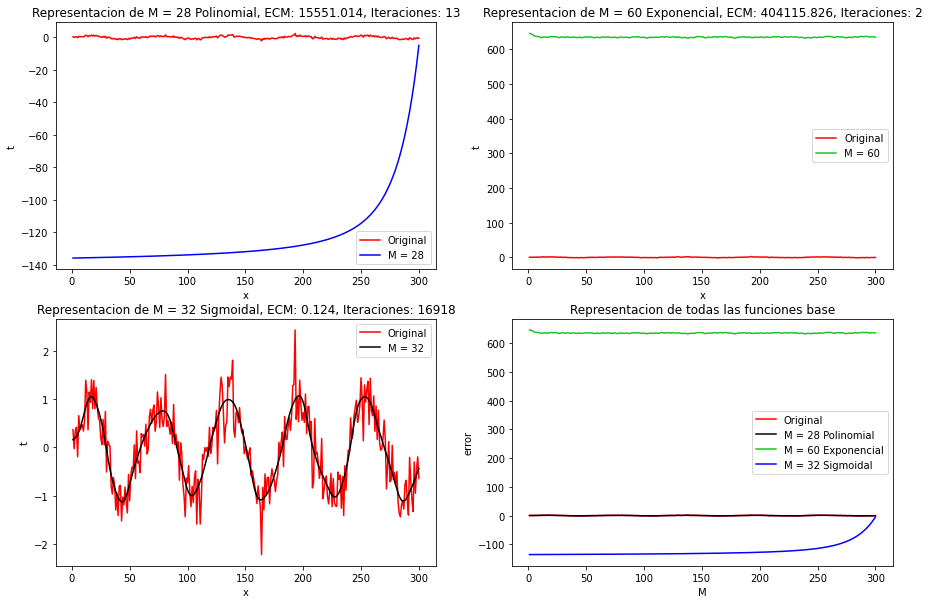

Error Cuadrados Polinomial: 0.2592687713255388
Error Gradiente Polinomial: 15551.014281484177
Diferencia Polinomial: 15550.75501271285
Error Cuadrados Exponencial: 0.10774568067018082
Error Gradiente Exponencial: 404115.82629756874
Diferencia Exponencial: -404115.7185518881
Error Cuadrados Sigmoidal: 0.12324062137779192
Error Gradiente Sigmoidal: 0.12414055652533096
Diferencia Sigmoidal: -0.000899935147539041

      W Polinomial Normalizado,      W Exponencial Normalizado,        W Sigmoidal Normalizado
            -4.933544333001323,              10.34609652191254,          -0.052486407851984454
           -3.9748683929822524,              8.067262417861308,             -1.240605775171712
           -3.6205921273153137,              11.14161239085751,             0.6076214292035454
            -4.454192251586852,             10.636368260708421,              1.565305395856506
             -3.35972643142766,              9.277366420824968,             0.5888509396925815
            -4.6

In [9]:

    #Valores de M

    m1=28
    m2=60
    m3=32

    #Graficación------------------------------------------------

    names=np.array(['M = '+str(m1),'M = '+str(m2),'M = '+str(m3)])

    #Calcular Predicción
    phiPoli1 = generarPhi(x, m1, 'p')
    phiExpo1 = generarPhi(x, m2, 'e')
    phiSigmo1 = generarPhi(x, m3, 's')

    #Normalizar la predicción
    phiPoli = normalizar(phiPoli1)
    phiExpo = normalizar(phiExpo1)
    phiSigmo = normalizar(phiSigmo1)
    
    #Generar las w Iniciales
    w1=generarInicioW(True,m1,1)
    w2=generarInicioW(True,m2,1)
    w3=generarInicioW(True,m3,1)
   
    
    canPoli,wPoli = calcularWGradiente(w1,m1,phiPoli,errorPoli+0.0009,0.1,10000)
    canExpo,wExpo = calcularWGradiente(w2,m2,phiExpo,errorExpo+0.0009,0.2,10000)
    canSigmo,wSigmo = calcularWGradiente(w3,m3,phiSigmo,errorSigmo+0.0009,0.1,20000)

    tpPoli=phiPoli@wPoli
    tpExpo=phiExpo@wExpo
    tpSigmo=phiSigmo@wSigmo
    
    errorPoliG=errorCuadraticoMedio(phiPoli,wPoli)
    errorExpoG=errorCuadraticoMedio(phiExpo,wExpo)
    errorSigmoG=errorCuadraticoMedio(phiSigmo,wSigmo)

    t0=np.arange(1,len(t)+1,1)
    t1=t0.reshape(len(t0),1)

    graficar(t1, t, tpPoli, canPoli, errorPoliG, tpExpo, errorExpoG, canExpo, tpSigmo, canSigmo, errorSigmoG, names)
    
    print()
    
    titulo = np.array(['W Polinomial Normalizado','W Exponencial Normalizado','W Sigmoidal Normalizado'])
    titulo = titulo[np.newaxis, :]
    wbles = np.concatenate((np.concatenate(( wPoli, np.zeros((m2-m1,1))) ,axis=0) ,wExpo),axis=1)
    wbles = np.concatenate((wbles, np.concatenate(( wSigmo, np.zeros((m2-m3,1))) ,axis=0) ),axis=1)
    wbles = np.concatenate((titulo, wbles),axis=0)
    for i in wbles:
        print(", ".join([str(l).rjust(30) for l in i]))

- Phi normalizado en la función polinomial presenta un incremento en el ECM muy notable con respecto a su versión no normalizada. El número de iteraciones se ve reducido bastante con el limitante del ECM, sin este, se alcanzan valores inmanejables. Se aprecia que el w Normalizado toma valores considerablemente mayores al w sin normalizar.


- Phi normalizado en la función exponencial presenta un incremento en el ECM muy notable con respecto a su versión no normalizada. El número de iteraciones se ve reducido bastante con el limitante del ECM, sin este, se alcanzan valores inmanejables.Se aprecia que el w Normalizado toma valores considerablemente mayores al w sin normalizar.


- Phi normalizado en la función sigmoidal no presenta un incremento en el ECM significativp con respecto a su versión no normalizada. El número de iteraciones se ve lijeramente mayor a su versión no normalizada. Se aprecia que el w Normalizado toma valores similares a su versión no normalizada, con menores diferencias poco significativas.


- Se tuvo que limitar el valor máximo que podía tomar el ECM por capacidad de computación, esto debido a las funciones Polinomial y Exponencial.


- Se considera el t prima generada por la función sigmoidal como la más apta para generar una predicción.